# Assessing and Identifying a Suitable Teacher Model

## Set-Up and Imports

In [13]:
import np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!tree ./logs

Folder PATH listing for volume Acer
Volume serial number is 06F4-9C1C
C:\USERS\PRANNAYA\NUSH\CS5131\PROJECT\RESEARCH\LOGS
+---bert-base-uncased-finetuned-sentence-classification
¦   +---save_metrics
¦       +---1648034827.6600163
¦       +---1648035498.9184391
+---distilbert-base-uncased-finetuned-sentence-classification
¦   +---save_metrics
¦       +---1648024208.5232677
+---distilgpt2-finetuned-sentence-classification
¦   +---save_metrics
¦       +---1648126069.261717
¦       +---1648126300.5147512
+---roberta-base-finetuned-sentence-classification
    +---save_metrics
        +---1648058086.7205102


In [4]:
from glob import glob
for filename in glob("logs/*/*.txt"): print(filename)

logs\bert-base-uncased-finetuned-sentence-classification\log_history.txt
logs\distilbert-base-uncased-finetuned-sentence-classification\log_history.txt
logs\distilgpt2-finetuned-sentence-classification\log_history.txt
logs\roberta-base-finetuned-sentence-classification\log_history.txt


In [12]:
logs = []
for filename in glob("logs/*/*.txt"):
    with open(filename) as logfile:
        log = list(map(eval, logfile.readlines()))
        logs.append(pd.DataFrame(log))
    
logs[0]

,loss,learning_rate,epoch,step,eval_loss,eval_accuracy,eval_precision,eval_recall,eval_f1,eval_kappa,eval_runtime,eval_samples_per_second,eval_steps_per_second,train_runtime,train_samples_per_second,train_steps_per_second,total_flos,train_loss
0,1.2823,1.992080e-05,0.02,500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0188,1.984160e-05,0.04,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.9180,1.976240e-05,0.06,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.8996,1.968319e-05,0.08,2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.8202,1.960399e-05,0.10,2500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,0.2110,1.995882e-07,4.95,125000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
254,0.2811,1.203865e-07,4.97,125500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
255,0.2579,4.118486e-08,4.99,126000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
256,NaN,NaN,5.00,126260,1.433945,0.782288,0.781535,0.782288,0.781397,0.70908,304.6149,94.785,23.699,NaN,NaN,NaN,NaN,NaN


In [17]:
logs[1].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   loss                      126 non-null    float64
 1   learning_rate             126 non-null    float64
 2   epoch                     132 non-null    float64
 3   step                      132 non-null    int64  
 4   eval_loss                 5 non-null      float64
 5   eval_accuracy             5 non-null      float64
 6   eval_precision            5 non-null      float64
 7   eval_recall               5 non-null      float64
 8   eval_f1                   5 non-null      float64
 9   eval_kappa                5 non-null      float64
 10  eval_runtime              5 non-null      float64
 11  eval_samples_per_second   5 non-null      float64
 12  eval_steps_per_second     5 non-null      float64
 13  train_runtime             1 non-null      float64
 14  train_samp

In [95]:
def plot(model, modelName):
    modelLoss = model[~model.loss.isna()].reset_index()[["loss", "learning_rate", "epoch", "step"]]
    modelTrain = model[model.loss.isna()].iloc[-1].dropna().drop(("epoch")).drop("step").to_dict()
    modelEval = model[model.loss.isna()].iloc[:-1].reset_index().drop(columns=["index", "loss", "learning_rate", "step", "train_runtime", "train_samples_per_second", "train_steps_per_second", "total_flos", "train_loss"])
    modelEval.epoch = modelEval.epoch.astype(int)
    modelEval = modelEval.set_index("epoch")
    ax = modelLoss.plot(y="loss", x="epoch", figsize=(16, 8), ylabel="Loss", xlabel="Epoch", title=f"Loss Curve of {modelName} Teacher Model", legend=False)
    colors = ["#ACDDDE", "#CAF1DE", "#E1F8DC", "#FEF8DD", "#FFE7C7", "#F7D8BA", "#D6CDEA"]
    for epoch, color in zip(range(5), colors):
        ax.axvspan(epoch, epoch+1, alpha=0.5, color=color)
    return modelLoss, modelTrain, modelEval

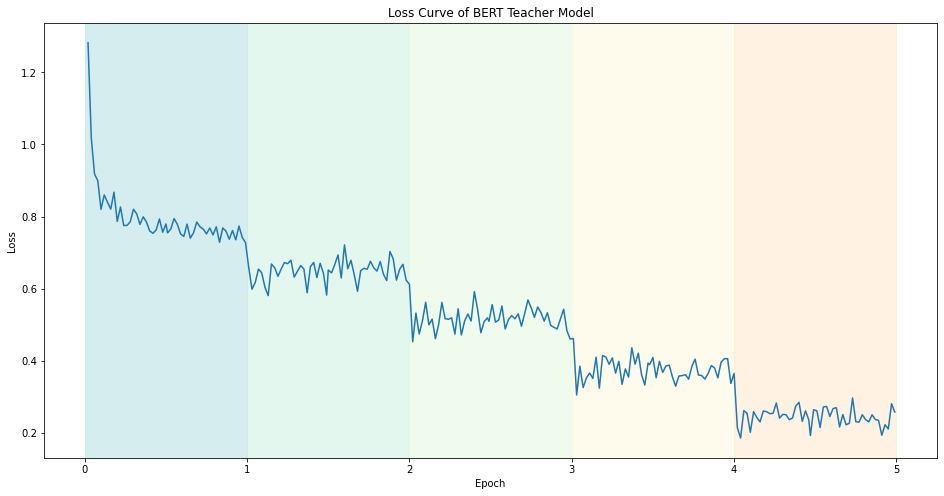

In [100]:
bertLoss, bertTrain, bertEval = plot(logs[0], "BERT")

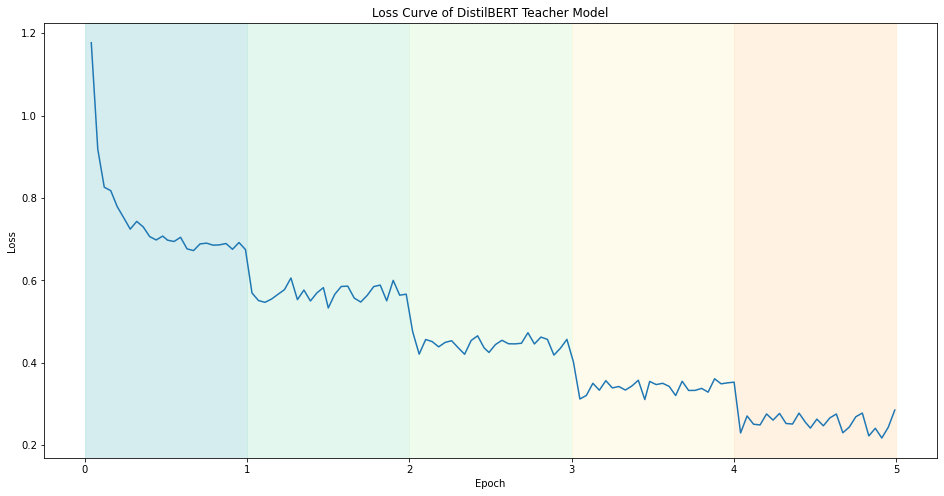

In [101]:
dbertLoss, dbertTrain, dbertEval = plot(logs[1], "DistilBERT")

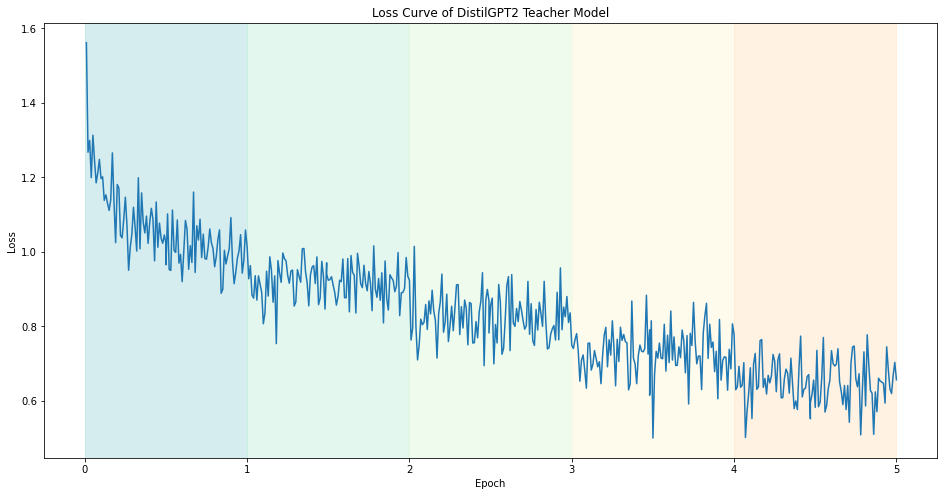

In [102]:
gptLoss, gptTrain, gptEval = plot(logs[2], "DistilGPT2")

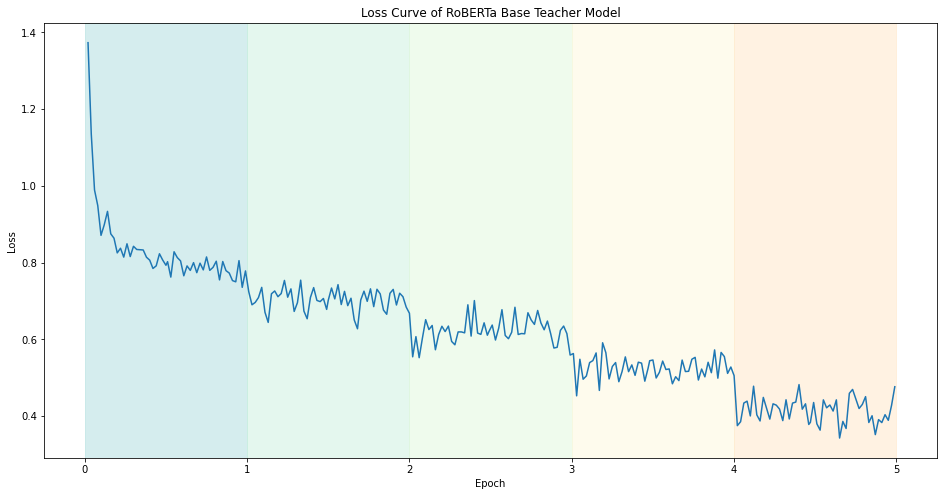

In [103]:
robertaLoss, robertaTrain, robertaEval = plot(logs[3], "RoBERTa Base")

In [104]:
bertTrain

{'train_runtime': 22549.2786,
 'train_samples_per_second': 22.397,
 'train_steps_per_second': 5.599,
 'total_flos': 1.2943880447120666e+17,
 'train_loss': 0.5155313400275806}

In [106]:
dbertLoss

,loss,learning_rate,epoch,step
0,1.1770,1.984160e-05,0.04,500
1,0.9186,1.968319e-05,0.08,1000
2,0.8261,1.952479e-05,0.12,1500
3,0.8177,1.936639e-05,0.16,2000
4,0.7788,1.920798e-05,0.20,2500
...,...,...,...,...
121,0.2223,6.747980e-07,4.83,61000
122,0.2408,5.163947e-07,4.87,61500
123,0.2171,3.579914e-07,4.91,62000
124,0.2435,1.995882e-07,4.95,62500


Text(0.5, 1.0, 'Loss Curves of Different Models')

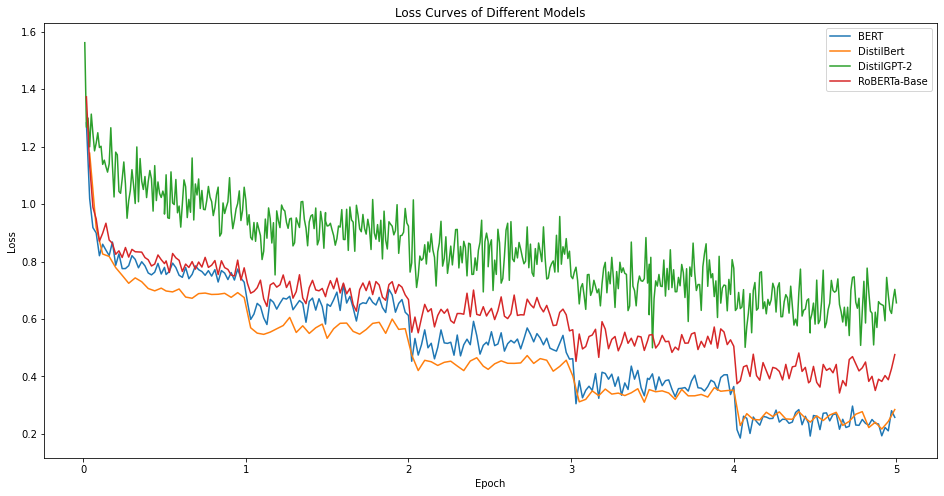

In [118]:
ax = bertLoss.plot(y="loss", x="epoch", figsize=(16, 8), ylabel="Loss", xlabel="Epoch", label=f"BERT")
dbertLoss.plot(y="loss", x="epoch", figsize=(16, 8), ylabel="Loss", xlabel="Epoch", label=f"DistilBert", ax=ax)
gptLoss.plot(y="loss", x="epoch", figsize=(16, 8), ylabel="Loss", xlabel="Epoch", label=f"DistilGPT-2", ax=ax)
robertaLoss.plot(y="loss", x="epoch", figsize=(16, 8), ylabel="Loss", xlabel="Epoch", label=f"RoBERTa-Base", ax=ax)
ax.set_title("Loss Curves of Different Models") 

<AxesSubplot:xlabel='Epoch', ylabel='Evaluation Accuracy'>

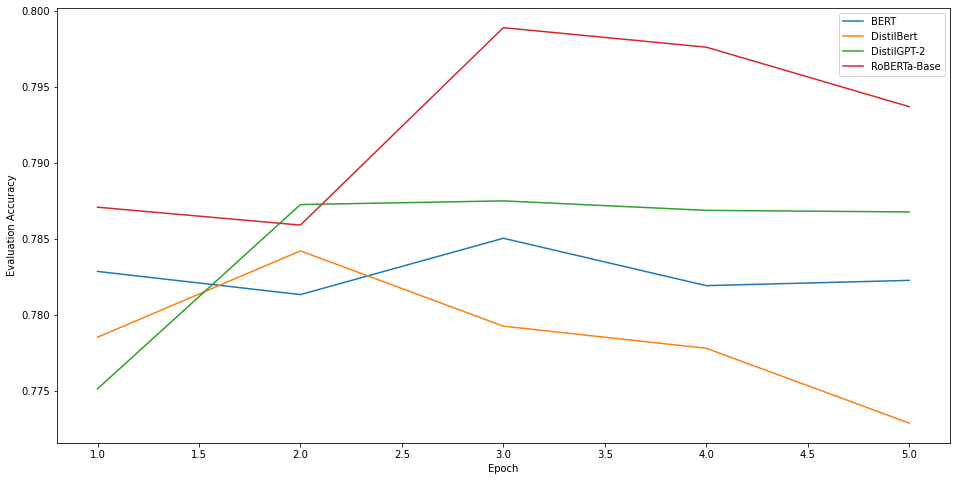

In [116]:
ax = bertEval.plot(y="eval_accuracy", figsize=(16, 8), ylabel="Evaluation Accuracy", xlabel="Epoch", label=f"BERT")
dbertEval.plot(y="eval_accuracy", figsize=(16, 8), xlabel="Epoch", label=f"DistilBert", ax=ax)
gptEval.plot(y="eval_accuracy", figsize=(16, 8), xlabel="Epoch", label=f"DistilGPT-2", ax=ax)
robertaEval.plot(y="eval_accuracy", figsize=(16, 8), xlabel="Epoch", label=f"RoBERTa-Base", ax=ax)


In [111]:
bertEval

,eval_loss,eval_accuracy,eval_precision,eval_recall,eval_f1,eval_kappa,eval_runtime,eval_samples_per_second,eval_steps_per_second
epoch,,,,,,,,,
1,0.729174,0.782877,0.781155,0.782877,0.779144,0.705525,304.9713,94.674,23.671
2,0.875062,0.781353,0.786734,0.781353,0.779188,0.706448,303.7391,95.059,23.767
3,0.955705,0.785059,0.785133,0.785059,0.783889,0.711924,304.9153,94.692,23.675
4,1.241650,0.781942,0.781918,0.781942,0.781095,0.708590,304.6042,94.789,23.700
5,1.433945,0.782288,0.781535,0.782288,0.781397,0.709080,304.6149,94.785,23.699
